# Hotel booking demand

##### Dataset: "https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand"

# Load and Explore

### 1. Basic Info
Load the dataset into a DataFrame and display:
* number of rows & columns
* data types of each column
* how many unique hotels exist

In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [216]:
df = pd.read_csv("hotel_bookings.csv")
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [217]:
df.shape

(119390, 32)

In [218]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [219]:
print(f"Number of unique hotels: {df['hotel'].nunique()}")
print(df['hotel'].unique())

Number of unique hotels: 2
['Resort Hotel' 'City Hotel']


### 2. Missing Values
Find columns with missing values. For each, print:
* column name
* total missing values
* percentage missing

In [221]:
df.columns[df.isnull().sum() > 0]

Index(['children', 'country', 'agent', 'company'], dtype='object')

In [222]:
missing_val_cols = ['children', 'country', 'agent', 'company']
for col in missing_val_cols:
    print(f"{col} : {df[col].isnull().sum()*100.0/len(df):.2f}")

children : 0.00
country : 0.41
agent : 13.69
company : 94.31


### 3. Cleaning children Column
* Convert null values in children column to 0
* Convert the column to integer type
* Print unique values of children

In [224]:
df['children'] = df['children'].fillna(0)

In [225]:
df['children'] = df['children'].astype('Int64')

In [226]:
df['children'].unique()

<IntegerArray>
[0, 1, 2, 10, 3]
Length: 5, dtype: Int64

# Data Transformation

4. Create arrival_date Column
* Combine:
    - arrival_date_year
    - arrival_date_month
    - arrival_date_day_of_month

  
into a single column: arrival_date with format YYYY-MM-DD

In [229]:
df['arrival_date_day_of_month'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' + 
                                                df['arrival_date_month'] + '-' + 
                                                df['arrival_date_day_of_month'].astype(str), 
                                                format = '%Y-%B-%d')



In [230]:
df['arrival_date_day_of_month'].head()

0   2015-07-01
1   2015-07-01
2   2015-07-01
3   2015-07-01
4   2015-07-01
Name: arrival_date_day_of_month, dtype: datetime64[ns]

### 5. Monthly Bookings Trend
* Group by month and hotel
* Count number of bookings
* Plot a line chart showing booking trends over months for both hotels

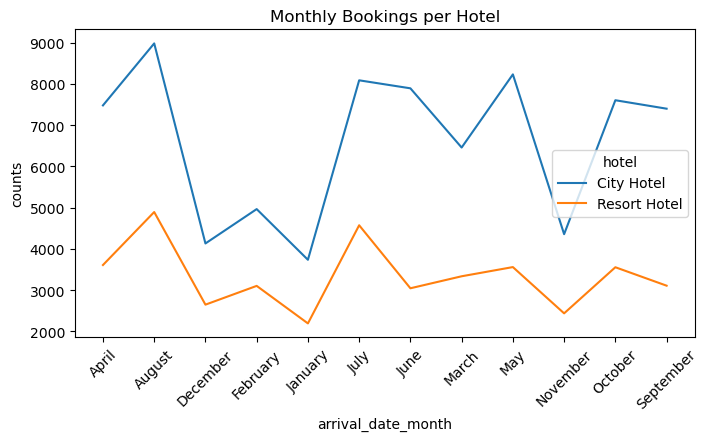

In [232]:
monthly_bookings = df.groupby(['arrival_date_month', 'hotel']).size().reset_index(name = 'counts')
monthly_bookings

plt.figure(figsize = (8,4))
sns.lineplot(data = monthly_bookings, x = 'arrival_date_month', y = 'counts', hue = 'hotel')
plt.xticks(rotation=45)  
plt.title("Monthly Bookings per Hotel")
plt.show()

# Exploratory Analysis

### 6. Lead Time vs. Cancellation

* Calculate average lead_time for bookings that were cancelled vs. not cancelled

* Use a bar chart to compare

C:\Users\Admin\AppData\Local\Temp\ipykernel_15116\2722454566.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_lead_time, x='is_canceled', y='lead_time', palette='Set2')


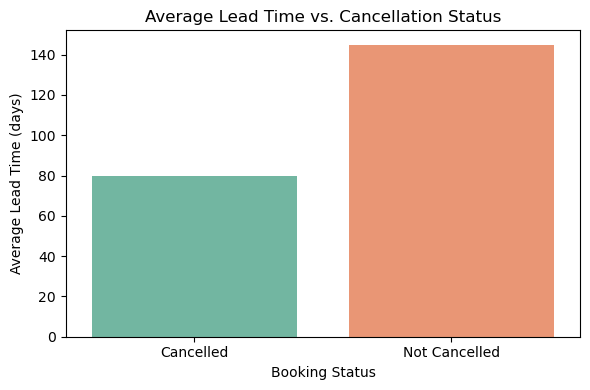

In [235]:
avg_lead_time = df.groupby('is_canceled')['lead_time'].mean().reset_index()
avg_lead_time['is_canceled'] = avg_lead_time['is_canceled'].map({0:'Cancelled', 1:'Not Cancelled'})

plt.figure(figsize=(6, 4))
sns.barplot(data=avg_lead_time, x='is_canceled', y='lead_time', palette='Set2')
plt.title('Average Lead Time vs. Cancellation Status')
plt.xlabel('Booking Status')
plt.ylabel('Average Lead Time (days)')
plt.tight_layout()
plt.show()

### 7. Guests Count Feature

* Create new column total_guests = adults + children + babies

* How many bookings had more than 4 guests?

In [237]:
df['total_guests'] = df['adults'] + df['children'] + df['babies']

booking_morethan_4 = len(df[df['total_guests'] > 4])
booking_morethan_4

154

### 8. Room Assignment Gap

* Count how many bookings had different reserved and assigned room types

* Print the % of such cases

In [239]:
diff_room_type = len(df[df['reserved_room_type'] != df['assigned_room_type']])
percent_room_type =round(diff_room_type*100.0/len(df),2)
percent_room_type

12.49

### 9. Average Stay Duration

* Compute stay_length = stays_in_weekend_nights + stays_in_week_nights

* Group by hotel and calculate average stay duration

In [241]:
df['stay_length'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
avg_stay_by_hotel = round(df.groupby('hotel')['stay_length'].mean(),2)
avg_stay_by_hotel

hotel
City Hotel      2.98
Resort Hotel    4.32
Name: stay_length, dtype: float64

### 10. Top Booking Countries

* List the top 5 countries by total number of bookings

* Plot a horizontal bar chart

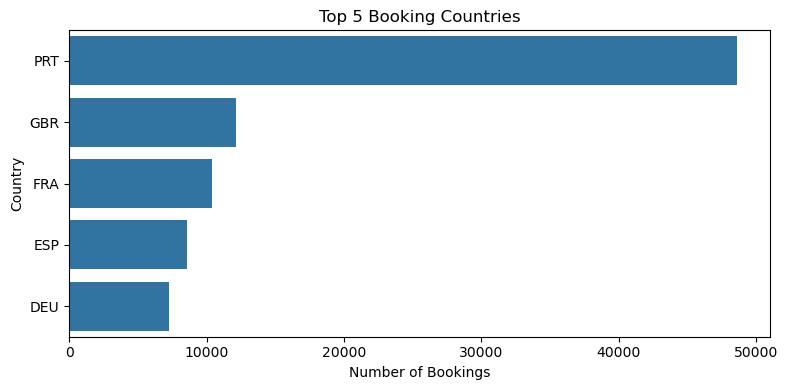

In [243]:
top_countries = df.groupby('country').size().sort_values(ascending = False).reset_index(name = 'count').head(5)
top_countries

plt.figure(figsize = (8,4))
sns.barplot(data = top_countries, x = 'count', y = 'country')
plt.title('Top 5 Booking Countries')
plt.xlabel('Number of Bookings')
plt.ylabel('Country')
plt.tight_layout()
plt.show()